In [3]:
#mount my drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#import the libraries
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
#create an array to store data
data = []  # To store image data
labels = []  # To store corresponding labels

base_dir = '/content/drive/MyDrive/DB (1)/Osteoarthritis/files'

# Loop through subfolders
for subdir in os.listdir(base_dir):
    if os.path.isdir(os.path.join(base_dir, subdir)):
        label = subdir  # Use the subfolder name as the label
        subfolder_path = os.path.join(base_dir, subdir)

        # Loop through image files in the subfolder
        for image_filename in os.listdir(subfolder_path):
            if image_filename.endswith('.jpg'):
                image_path = os.path.join(subfolder_path, image_filename)
                image = cv2.imread(image_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
                image = cv2.resize(image, (224, 224))  # Resize images to a common size

                data.append(image)
                labels.append(label)

# Convert data and labels to NumPy arrays
data = np.array(data)
labels = np.array(labels)

In [8]:
#Did it work? print the shape of data
print("Shape of data:", data.shape)
print("Shape of labels:", labels.shape)

Shape of data: (50, 224, 224, 3)
Shape of labels: (50,)


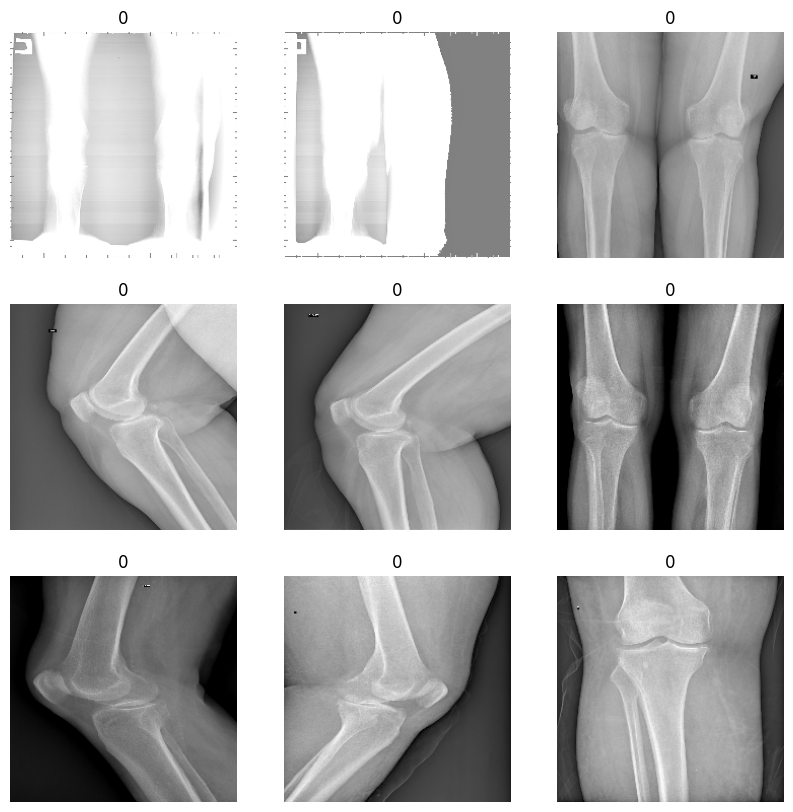

In [21]:
#plot an example
import matplotlib.pyplot as plt

# Display sample images
plt.figure(figsize=(10, 10))
for i in range(9):  # Display the first 9 images
    plt.subplot(3, 3, i + 1)
    plt.imshow(data[i])
    plt.title(labels[i])
    plt.axis('off')
plt.show()

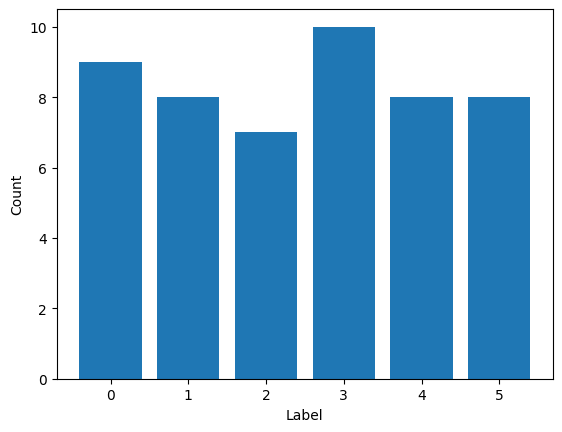

In [22]:
unique_labels, label_counts = np.unique(labels, return_counts=True)
plt.bar(unique_labels, label_counts)
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

In [13]:
# Import necessary libraries
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split

#select the path
base_dir = '/content/drive/MyDrive/DB (1)/Osteoarthritis/files'

# Load image data and labels
data = []
labels = []

for subdir in os.listdir(base_dir):
    if os.path.isdir(os.path.join(base_dir, subdir)):
        label = subdir
        subfolder_path = os.path.join(base_dir, subdir)

        for image_filename in os.listdir(subfolder_path):
            if image_filename.endswith('.jpg'):
                image_path = os.path.join(subfolder_path, image_filename)
                image = cv2.imread(image_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, (224, 224))

                data.append(image)
                labels.append(label)

data = np.array(data)
labels = np.array(labels)

# Encode labels into numerical values
label_to_index = {label: i for i, label in enumerate(np.unique(labels))}
index_to_label = {i: label for label, i in label_to_index.items()}
labels = np.array([label_to_index[label] for label in labels])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Build a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(label_to_index), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')


Epoch 1/10
1/1 [==============================] - 7s 7s/step - loss: 26.9477 - accuracy: 0.1250 - val_loss: 4877.6934 - val_accuracy: 0.1250
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 3264.9390 - accuracy: 0.2500 - val_loss: 5179.2129 - val_accuracy: 0.1250
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 4531.1743 - accuracy: 0.2500 - val_loss: 4296.4170 - val_accuracy: 0.2500
Epoch 4/10
1/1 [==============================] - 2s 2s/step - loss: 3811.0027 - accuracy: 0.1562 - val_loss: 3787.1265 - val_accuracy: 0.1250
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 3190.8586 - accuracy: 0.1875 - val_loss: 2306.6064 - val_accuracy: 0.1250
Epoch 6/10
1/1 [==============================] - 4s 4s/step - loss: 1809.6882 - accuracy: 0.1875 - val_loss: 1562.9983 - val_accuracy: 0.1250
Epoch 7/10
1/1 [==============================] - 3s 3s/step - loss: 1185.8392 - accuracy: 0.1875 - val_loss: 919.4987 - val_accuracy: 0.1250
Ep

# Optimize hyperparameters

### There are several strategies to improve the performance of the model, in this case, we will use **data augmentation**

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Add data augmentation to the ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    rescale=1.0/255
)

# Use data augmentation during model training
train_data = datagen.flow(X_train, y_train, batch_size=32)

### A different way to improve the model is called **Transfer Learning**: a pre-trained model as a feature extractor and fine-tuning it on your dataset. Very effective when we have a limited amount of data.


In [23]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add your custom classification layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(len(unique_labels), activation='softmax')
])

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile and train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_data, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
2/2 [==============================] - 42s 34s/step - loss: 12.3639 - accuracy: 0.1250 - val_loss: 62.6495 - val_accuracy: 0.2000
Epoch 2/10
2/2 [==============================] - 33s 29s/step - loss: 6.0130 - accuracy: 0.2000 - val_loss: 35.6107 - val_accuracy: 0.2000
Epoch 3/10
2/2 [==============================] - 33s 29s/step - loss: 3.5635 - accuracy: 0.2250 - val_loss: 33.0357 - val_accuracy: 0.2000
Epoch 4/10
2/2 [==============================] - 29s 10s/step - loss: 1.6467 - accuracy: 0.3000 - val_loss: 56.4691 - val_accuracy: 0.2000
Epoch 5/10
2/2 [==============================] - 31s 11s/step - loss: 2.4242 - accuracy: 0.3500 - val_loss: 59.1247 - val_accuracy: 0.3000
Epoch 6/10
2/2 [==============================] - 31s 27s/step - loss: 2.1869 - accuracy: 0.3750 - val_loss: 68.4333 - val_accuracy: 0.1000
Epoch 7/10
2/2 [==============================] - 28s 11s/step - loss: 1.7425 - accuracy: 0.4000 - val_loss: 56.7595 - val_accuracy: 0.1000
Epoch 8/10
2/2 [===

In [16]:
# Example learning rate schedule
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

# Define a learning rate schedule
def lr_schedule(epoch):
    lr = 0.001
    if epoch > 15:
        lr *= 0.1
    return lr

# Create an optimizer with the learning rate schedule
optimizer = Adam(learning_rate=lr_schedule(0))

# Compile the model with the optimizer
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with the learning rate schedule callback
model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), callbacks=[LearningRateScheduler(lr_schedule)])

Epoch 1/30
2/2 [==============================] - 31s 11s/step - loss: 28.3485 - accuracy: 0.4250 - val_loss: 73.6586 - val_accuracy: 0.2000 - lr: 0.0010
Epoch 2/30
2/2 [==============================] - 30s 12s/step - loss: 39.1993 - accuracy: 0.4000 - val_loss: 57.4415 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 3/30
2/2 [==============================] - 28s 10s/step - loss: 8.3995 - accuracy: 0.8000 - val_loss: 46.0441 - val_accuracy: 0.3000 - lr: 0.0010
Epoch 4/30
2/2 [==============================] - 30s 11s/step - loss: 2.3787 - accuracy: 0.8500 - val_loss: 62.0227 - val_accuracy: 0.4000 - lr: 0.0010
Epoch 5/30
2/2 [==============================] - 28s 11s/step - loss: 0.1821 - accuracy: 0.9500 - val_loss: 81.0192 - val_accuracy: 0.3000 - lr: 0.0010
Epoch 6/30
2/2 [==============================] - 27s 10s/step - loss: 0.6575 - accuracy: 0.8500 - val_loss: 91.9195 - val_accuracy: 0.3000 - lr: 0.0010
Epoch 7/30
2/2 [==============================] - 31s 14s/step - loss: 0.5513 - 

In [18]:
# Save the model to a file
model.save("model.h5")

In [19]:
# Save the model architecture to a JSON file
model_json = model.to_json()
with open("my_model.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights to an HDF5 file
model.save_weights("my_model_weights.h5")